# 读取数据集😄

In [2]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('./dataset/metro-bike-share-trip-data.csv')

In [4]:
data.head(1)

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long
0,1912818,180,2016-07-07T04:17:00,2016-07-07T04:20:00,3014.0,34.05661,-118.23721,3014.0,34.05661,-118.23721,6281.0,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.23721', 'latitude': '34.05...","{'longitude': '-118.23721', 'latitude': '34.05..."


In [5]:
data.shape

(132427, 16)

---

# 挑选需要分析的列(Select necessary Columns)😥

### station_info

In [10]:
station_info = data[['Starting Station ID','Starting Station Latitude','Starting Station Longitude','Ending Station ID','Ending Station Latitude','Ending Station Longitude']]
station_info.head()

,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude
0,3014.0,34.056610,-118.23721,3014.0,34.056610,-118.23721
1,3014.0,34.056610,-118.23721,3014.0,34.056610,-118.23721
2,3016.0,34.052898,-118.24156,3016.0,34.052898,-118.24156
3,3016.0,34.052898,-118.24156,3016.0,34.052898,-118.24156
4,3032.0,34.049889,-118.25588,3032.0,34.049889,-118.25588


In [11]:
start_station = station_info[['Starting Station ID','Starting Station Longitude','Starting Station Latitude']]
#start_station.head()

In [12]:
end_station = station_info[['Ending Station ID','Ending Station Longitude','Ending Station Latitude']]
#end_station.head()

### bike_info

In [13]:
bike_info = data[['Duration','Start Time','End Time','Trip Route Category','Plan Duration','Passholder Type']]
bike_info.head()

,Duration,Start Time,End Time,Trip Route Category,Plan Duration,Passholder Type
0,180,2016-07-07T04:17:00,2016-07-07T04:20:00,Round Trip,30.0,Monthly Pass
1,1980,2016-07-07T06:00:00,2016-07-07T06:33:00,Round Trip,30.0,Monthly Pass
2,300,2016-07-07T10:32:00,2016-07-07T10:37:00,Round Trip,365.0,Flex Pass
3,10860,2016-07-07T10:37:00,2016-07-07T13:38:00,Round Trip,365.0,Flex Pass
4,420,2016-07-07T12:51:00,2016-07-07T12:58:00,Round Trip,0.0,Walk-up


In [14]:
data['Passholder Type'].value_counts()

Monthly Pass    81304
Walk-up         41224
Flex Pass        9517
Staff Annual      382
Name: Passholder Type, dtype: int64

### trip_info

In [15]:
trip_info = data[['Duration','Start Time','End Time','Starting Station ID','Ending Station ID','Trip Route Category','Plan Duration','Passholder Type']]
trip_info.head()

,Duration,Start Time,End Time,Starting Station ID,Ending Station ID,Trip Route Category,Plan Duration,Passholder Type
0,180,2016-07-07T04:17:00,2016-07-07T04:20:00,3014.0,3014.0,Round Trip,30.0,Monthly Pass
1,1980,2016-07-07T06:00:00,2016-07-07T06:33:00,3014.0,3014.0,Round Trip,30.0,Monthly Pass
2,300,2016-07-07T10:32:00,2016-07-07T10:37:00,3016.0,3016.0,Round Trip,365.0,Flex Pass
3,10860,2016-07-07T10:37:00,2016-07-07T13:38:00,3016.0,3016.0,Round Trip,365.0,Flex Pass
4,420,2016-07-07T12:51:00,2016-07-07T12:58:00,3032.0,3032.0,Round Trip,0.0,Walk-up


---

## discover station info

In [16]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [17]:
start_station.head().dropna()

,Starting Station ID,Starting Station Longitude,Starting Station Latitude
0,3014.0,-118.23721,34.056610
1,3014.0,-118.23721,34.056610
2,3016.0,-118.24156,34.052898
3,3016.0,-118.24156,34.052898
4,3032.0,-118.25588,34.049889


In [18]:
grouped = start_station.groupby('Starting Station ID')

In [19]:
count_value = start_station['Starting Station ID'].value_counts().values

In [20]:
st_info = grouped.max()
st_info.insert(2,'Counts',count_value)

In [21]:
st_info.head()

,Starting Station Longitude,Starting Station Latitude,Counts
Starting Station ID,,,
3000.0,NaN,NaN,5138
3005.0,-118.259048,34.048550,5059
3006.0,-118.256668,34.045540,4883
3007.0,-118.254590,34.050480,4661
3008.0,-118.262730,34.046612,4629


---

## discover bike info

In [22]:
bike_info.head()

,Duration,Start Time,End Time,Trip Route Category,Plan Duration,Passholder Type
0,180,2016-07-07T04:17:00,2016-07-07T04:20:00,Round Trip,30.0,Monthly Pass
1,1980,2016-07-07T06:00:00,2016-07-07T06:33:00,Round Trip,30.0,Monthly Pass
2,300,2016-07-07T10:32:00,2016-07-07T10:37:00,Round Trip,365.0,Flex Pass
3,10860,2016-07-07T10:37:00,2016-07-07T13:38:00,Round Trip,365.0,Flex Pass
4,420,2016-07-07T12:51:00,2016-07-07T12:58:00,Round Trip,0.0,Walk-up


In [23]:
bike_info['Trip Route Category'].unique()

array(['Round Trip', 'One Way'], dtype=object)

In [24]:
bike_info['Passholder Type'].unique()

array(['Monthly Pass', 'Flex Pass', 'Walk-up', 'Staff Annual'],
      dtype=object)

In [25]:
bike_info['Plan Duration'].unique()

array([ 30., 365.,   0.,  nan])

In [26]:
bike_info.describe()

,Duration,Plan Duration
count,132427.000000,131661.000000
mean,1555.301562,44.821967
std,5814.241813,90.411579
min,60.000000,0.000000
25%,360.000000,0.000000
50%,600.000000,30.000000
75%,1080.000000,30.000000
max,86400.000000,365.000000


---

# 分析思路(Analysis methods)😜

- 热门Station分布分析(**Distribution of Hot Stations**)
- 2.共享单车出行高峰时间段分析(**Rush Hour Analysis**)
- 3.单程与往返的比较分析(**Round Trip/One Way Comparison Analysis**)
- 使用时长与会员卡类型的关联度分析(**relevancy analysis between Duration&Passholder Type**)

---

# 开始数据分析(Data Analysis)😁

### 1）共享单车热门开始站分布可视化探索

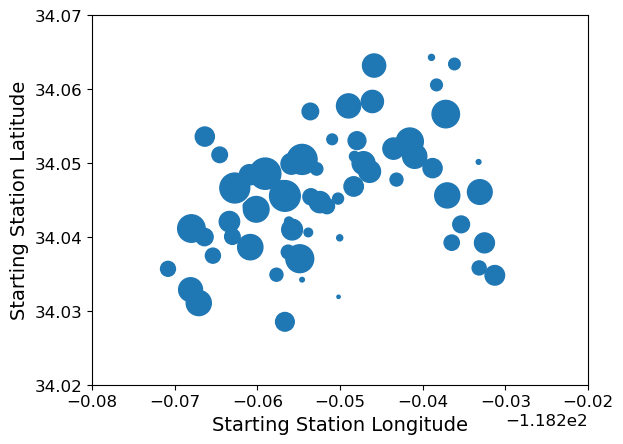

In [27]:
pic = st_info.plot(kind="scatter", x="Starting Station Longitude", y="Starting Station Latitude",s = st_info['Counts']/10,
                        alpha=1)
plt.axis([-118.28,-118.22,34.02,34.07])
plt.show()

### Conclusion

- If there is a **L.A. map** should be better to analysis...

---

## 2）共享单车出行高峰时间段分析(Rush Hour Analysis)

### 正则提取时间(use regular expression to extract the Time)

In [28]:
bike_info = bike_info.dropna()

In [29]:
import re
from pandas import Series,DataFrame

pattern_time = '[0-9][0-9]:[0-9][0-9]:[0-9][0-9]'
pattern_hour = '[0-9][0-9]'

In [30]:
timelist = []
for item in bike_info['Start Time']:
    time = re.findall(pattern_time,item)[0]
    timelist.append(time)

In [31]:
timelist[:5]

['04:17:00', '06:00:00', '10:32:00', '10:37:00', '12:51:00']

### 提取hour(extract the Hour)

In [32]:
hourlist = []
for item in timelist:
    hour = re.findall(pattern_hour,item)[0]
    hourlist.append(hour)

In [33]:
hourlist[:5]

['04', '06', '10', '10', '12']

In [34]:
timeSeries = Series(timelist)
hourSeries = Series(hourlist)

In [35]:
bike_info.head()

,Duration,Start Time,End Time,Trip Route Category,Plan Duration,Passholder Type
0,180,2016-07-07T04:17:00,2016-07-07T04:20:00,Round Trip,30.0,Monthly Pass
1,1980,2016-07-07T06:00:00,2016-07-07T06:33:00,Round Trip,30.0,Monthly Pass
2,300,2016-07-07T10:32:00,2016-07-07T10:37:00,Round Trip,365.0,Flex Pass
3,10860,2016-07-07T10:37:00,2016-07-07T13:38:00,Round Trip,365.0,Flex Pass
4,420,2016-07-07T12:51:00,2016-07-07T12:58:00,Round Trip,0.0,Walk-up


In [36]:
bike_info.insert(3,'Start Hour',hourSeries)

In [37]:
bike_info.head()

,Duration,Start Time,End Time,Start Hour,Trip Route Category,Plan Duration,Passholder Type
0,180,2016-07-07T04:17:00,2016-07-07T04:20:00,04,Round Trip,30.0,Monthly Pass
1,1980,2016-07-07T06:00:00,2016-07-07T06:33:00,06,Round Trip,30.0,Monthly Pass
2,300,2016-07-07T10:32:00,2016-07-07T10:37:00,10,Round Trip,365.0,Flex Pass
3,10860,2016-07-07T10:37:00,2016-07-07T13:38:00,10,Round Trip,365.0,Flex Pass
4,420,2016-07-07T12:51:00,2016-07-07T12:58:00,12,Round Trip,0.0,Walk-up


In [38]:
Start_Hour_counts = bike_info['Start Hour'].value_counts().sort_index()

In [90]:
# from pyecharts import Line
#
# attr =list(map(int, Start_Hour_counts.index))
# v =  Start_Hour_counts.values
# line = Line("Rush Hour Analysis")
# line.add("", attr, v,mark_point=["min","max"],is_smooth=True)
#
# line.render('rush-hour-line.html')
# line
# from pyecharts.charts import Line
# from pyecharts import options as opts
#
# attr = list(map(int, Start_Hour_counts.index))
# print(attr)
# v = Start_Hour_counts.values
# print(v)
# line = Line(init_opts=opts.InitOpts(width='1000px', height='400px'))
# line.add_xaxis(attr)
# line.add_yaxis("", v, markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_='max'), opts.MarkPointItem(type_='min')]))
# line.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
# line.set_global_opts(title_opts=opts.TitleOpts(title='Rush Hour Analysis'))
#
# line.render('rush-hour-line.html')
from pyecharts.charts import Line
from pyecharts import options as opts

# # Use your data
# x_data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
# y_data = [1771, 1337, 864, 445, 417, 559, 1735, 4684, 6805, 6210, 5356, 7546, 9920, 9628, 8356, 8231, 9863, 11606, 10347, 7876, 5946, 4845, 3799, 2757]
attr = list(map(int, Start_Hour_counts.index))
print(attr)
v = Start_Hour_counts.values.tolist()
print(v)
# Create a line chart
line = Line(init_opts=opts.InitOpts(width='1000px', height='400px'))
line.add_xaxis(attr)
line.add_yaxis("", v, markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_='max'), opts.MarkPointItem(type_='min')]))
line.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
line.set_global_opts(title_opts=opts.TitleOpts(title='Rush Hour Analysis'))

# Save the chart to an HTML file
line.render('rush-hour-line.html')


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[1771, 1337, 864, 445, 417, 559, 1735, 4684, 6805, 6210, 5356, 7546, 9920, 9628, 8356, 8231, 9863, 11606, 10347, 7876, 5946, 4845, 3799, 2757]


'D:\\homework\\LA-Metro-Bike-Share-Analysis-master\\LA-Metro-Bike-Share-Analysis-master\\rush-hour-line.html'

### Conclusion

- 共享单车出行者通常选择在**7a.m.-20p.m.**出行
- **6a.m.-8a.m.**早高峰时段，**10a.m.-12a.m.**午高峰时段以及**15a.m.-17a.m.晚高峰时段**都有明显的用车量增加。
- 出行最高峰是**17p.m**.，推测为**下班晚高峰**
- 出行最低谷为**4a.m.**，凌晨的用车辆非常少
- 从高峰到低谷是一个完全**下降趋势**，用车辆逐渐降低

- Shared-bike riders usually choose to start their trip at **7a.m.-20p.m**
- **6a.m.-8a.m.**morning peak period, **10a.m.-12a.m.**afternoon peak period and **15a.m.-17a.m.**evening peak period shows significant increase in shared-bike use
- The peak of use is **17p.m.**, which is presumed to be **the evening peak**
- The lowest point of use is **4a.m**,few shared-bikes are used in mid-night
- From the peak to the lowest point is a **complete downward trend**, with the vehicle gradually reduced

---

## 3）单车使用时长与会员卡持有种类的相关性分析
## (relevancy analysis between Duration&Passholder Type)

In [43]:
bike_trip_info = bike_info[['Duration','Trip Route Category','Plan Duration','Passholder Type']]
bike_trip_info.head()

,Duration,Trip Route Category,Plan Duration,Passholder Type
0,180,Round Trip,30.0,Monthly Pass
1,1980,Round Trip,30.0,Monthly Pass
2,300,Round Trip,365.0,Flex Pass
3,10860,Round Trip,365.0,Flex Pass
4,420,Round Trip,0.0,Walk-up


### 单独提取Duration，进行聚类(cluster by Duration)

In [44]:
duration = bike_trip_info[['Duration']]
duration.head()
# duration时间单位为 秒

,Duration
0,180
1,1980
2,300
3,10860
4,420


In [46]:
from sklearn.cluster import KMeans # 导入Kmeans

k=4 # 聚类类别数
kmodel = KMeans(n_clusters=k)
kmodel.fit(duration)

KMeans(n_clusters=4)

In [47]:
# 查看聚类中心
kmodel.cluster_centers_

array([[  852.28531007],
       [79762.47011952],
       [38263.11864407],
       [ 9696.06469003]])

In [48]:
# 从低到高的排序
c = pd.DataFrame(kmodel.cluster_centers_).sort_values(0)
c['Duration Class'] = ['short-time','medium-time','long-time','very-long-time']
c.columns=['Duration','Duration Class']
c

,Duration,Duration Class
0,852.285310,short-time
3,9696.064690,medium-time
2,38263.118644,long-time
1,79762.470120,very-long-time


In [49]:
# 获取聚类后各类别的index
short = c[c['Duration Class']=='short-time'].index[0]
medium = c[c['Duration Class']=='medium-time'].index[0]
long = c[c['Duration Class']=='long-time'].index[0]
verylong = c[c['Duration Class']=='very-long-time'].index[0]

In [50]:
# duration映射函数
duration_map = {
    short:'short-time',
    medium:'medium-time',
    long:'long-time',
    verylong:'very-long-time'
}

In [51]:
labels = kmodel.labels_
#labels：聚类结果对应的标签

### 将聚类后的结果插入bike_trip_info中(Insert the results into the ***bike_trip_info***)

In [52]:
bike_trip_info.insert(1,'Duration Class',labels)

In [53]:
# map映射函数
bike_trip_info['Duration Class'] = bike_trip_info['Duration Class'].map(duration_map)

In [54]:
bike_trip_info.head()

,Duration,Duration Class,Trip Route Category,Plan Duration,Passholder Type
0,180,short-time,Round Trip,30.0,Monthly Pass
1,1980,short-time,Round Trip,30.0,Monthly Pass
2,300,short-time,Round Trip,365.0,Flex Pass
3,10860,medium-time,Round Trip,365.0,Flex Pass
4,420,short-time,Round Trip,0.0,Walk-up


**查看各类Duration数量**

In [55]:
bike_trip_info['Duration Class'].value_counts()

short-time        127230
medium-time         3339
long-time            590
very-long-time       502
Name: Duration Class, dtype: int64

---

### Duration Class探索

#### very-long-time 探索

In [56]:
verylong_counts = bike_trip_info[bike_trip_info['Duration Class']=='very-long-time']['Plan Duration'].value_counts()
series1 = verylong_counts/sum(verylong_counts)
series1

0.0      0.808765
30.0     0.141434
365.0    0.049801
Name: Plan Duration, dtype: float64

#### long-time 探索

In [57]:
long_counts = bike_trip_info[bike_trip_info['Duration Class']=='long-time']['Plan Duration'].value_counts()
series2 = long_counts/sum(long_counts)

#### medium-time 探索

In [58]:
medium_counts = bike_trip_info[bike_trip_info['Duration Class']=='medium-time']['Plan Duration'].value_counts()
series3 = medium_counts/sum(medium_counts)

#### short-time 探索

In [59]:
short_counts = bike_trip_info[bike_trip_info['Duration Class']=='short-time']['Plan Duration'].value_counts()
series4 = short_counts/sum(short_counts)
series4 = series4.sort_index()

---

### 雷达图可视化(Radar Chart)

In [60]:
duration_rate = DataFrame(list(zip(series1,series2,series3)))

In [61]:
duration_rate.columns = ['very-long-time','long-time','medium-time']
duration_rate.index = ['0','30','365']

In [62]:
duration_rate = duration_rate[['medium-time','long-time','very-long-time']]
duration_rate.insert(0,'short-time',series4.values)

In [63]:
duration_rate

,short-time,medium-time,long-time,very-long-time
0,0.297862,0.756214,0.671186,0.808765
30,0.628979,0.195867,0.288136,0.141434
365,0.073159,0.047919,0.040678,0.049801


In [94]:
# from pyecharts import Radar
#
# schema = [("0",0.81), ("30", 0.63), ("365", 0.08)]
# v1 = [duration_rate['short-time'].values.round(2)]
# v2 = [duration_rate['medium-time'].values.round(2)]
# v3 = [duration_rate['long-time'].values.round(2)]
# v4 = [duration_rate['very-long-time'].values.round(2)]
#
# radar = Radar("Radar chart")
# radar.config(schema)
# radar.add("short-time", v1, is_splitline=True, is_axisline_show=True)
# radar.add("medium-time", v2, is_area_show=False, legend_selectedmode='single')
# radar.add("long-time", v3, is_area_show=False, legend_selectedmode='single')
# radar.add("very-long-time", v4, is_area_show=False, legend_selectedmode='single')
#
# radar.render('Radar-chart.html')
# radar

from pyecharts.charts import Radar
from pyecharts import options as opts

schema = [("0", 0.81), ("30", 0.63), ("365", 0.08)]
v1 = [duration_rate['short-time'].values.round(2).tolist()]
v2 = [duration_rate['medium-time'].values.round(2).tolist()]

radar = Radar(init_opts=opts.InitOpts(width='1000px', height='400px'))
radar.add_schema(schema=schema, shape='circle')
radar.add("Short Time", v1)
radar.add("Medium Time", v2)
radar.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
radar.set_global_opts(title_opts=opts.TitleOpts(title='Duration Rate Analysis'))

radar.render('duration-rate-radar.html')


'D:\\homework\\LA-Metro-Bike-Share-Analysis-master\\LA-Metro-Bike-Share-Analysis-master\\duration-rate-radar.html'

### Conclusion

- 共享单车使用使用时间**特别长**的用户中**绝大部分使用者**是**即用即走型用户**
- **短途**共享单车使用者中**超过6成比例**为**月卡持有者**
- 其次，**短途**共享单车使用者中的**年卡持有者**的比例也是所有类型中**最高的**

- The **majority** of users who use shared-bikes for a **very-long-time** are those who use them **immediately**.
- **Over 60%** of users who use shared-bikes for a **short-time** are those who possess **Monthly-Pass**.
-  The percentage of those who possess Flex-Pass among **short-time trip** bike users is also the **highest among all types**.

---

## 4）单程与往返的比较分析(Round Trip/One Way Comparison Analysis)

In [57]:
bike_info.head()

,Duration,Start Time,End Time,Start Hour,Trip Route Category,Plan Duration,Passholder Type
0,180,2016-07-07T04:17:00,2016-07-07T04:20:00,04,Round Trip,30.0,Monthly Pass
1,1980,2016-07-07T06:00:00,2016-07-07T06:33:00,06,Round Trip,30.0,Monthly Pass
2,300,2016-07-07T10:32:00,2016-07-07T10:37:00,10,Round Trip,365.0,Flex Pass
3,10860,2016-07-07T10:37:00,2016-07-07T13:38:00,10,Round Trip,365.0,Flex Pass
4,420,2016-07-07T12:51:00,2016-07-07T12:58:00,12,Round Trip,0.0,Walk-up


### 划分出单程与往返的frame(Divide the 'Round Trip'&'One Way')

In [66]:
one_way_trip = bike_info[bike_info['Trip Route Category']=='One Way']
round_trip = bike_info[bike_info['Trip Route Category']=='Round Trip']

In [67]:
one_way_trip.head()

,Duration,Start Time,End Time,Start Hour,Trip Route Category,Plan Duration,Passholder Type
5,780,2016-07-07T12:51:00,2016-07-07T13:04:00,12,One Way,30.0,Monthly Pass
6,600,2016-07-07T12:54:00,2016-07-07T13:04:00,12,One Way,30.0,Monthly Pass
7,600,2016-07-07T12:59:00,2016-07-07T13:09:00,12,One Way,365.0,Flex Pass
9,960,2016-07-07T13:01:00,2016-07-07T13:17:00,13,One Way,30.0,Monthly Pass
10,960,2016-07-07T13:02:00,2016-07-07T13:18:00,13,One Way,365.0,Flex Pass


In [68]:
round_trip.head()

,Duration,Start Time,End Time,Start Hour,Trip Route Category,Plan Duration,Passholder Type
0,180,2016-07-07T04:17:00,2016-07-07T04:20:00,04,Round Trip,30.0,Monthly Pass
1,1980,2016-07-07T06:00:00,2016-07-07T06:33:00,06,Round Trip,30.0,Monthly Pass
2,300,2016-07-07T10:32:00,2016-07-07T10:37:00,10,Round Trip,365.0,Flex Pass
3,10860,2016-07-07T10:37:00,2016-07-07T13:38:00,10,Round Trip,365.0,Flex Pass
4,420,2016-07-07T12:51:00,2016-07-07T12:58:00,12,Round Trip,0.0,Walk-up


### 分析One Way与Round出发时间点

In [69]:
one_way_hour = one_way_trip['Start Hour'].value_counts().sort_index()
round_hour = round_trip['Start Hour'].value_counts().sort_index()

In [96]:
# from pyecharts.charts import Line
#
# x1 =list(map(int, one_way_hour.index))
# y1 =  one_way_hour.values
#
# x2 = list(map(int, round_hour.index))
# y2 = round_hour.values
#
# line = Line("单程/往返出发时间点分析")
# line.add("one way", x1, y1,mark_point=["max"],is_smooth=True)
# line.add("round", x2, y2,mark_point=["max"],is_smooth=True)
#
# line.render('出发时间点分析.html')
# line
from pyecharts.charts import Line
from pyecharts import options as opts

x1 = list(map(int, one_way_hour.index))
y1 = one_way_hour.values.tolist()

x2 = list(map(int, round_hour.index))
y2 = round_hour.values.tolist()

line = Line(init_opts=opts.InitOpts(width='1000px', height='400px'))
line.add_xaxis(x1)
line.add_yaxis("one way", y1, markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_='max')]))
line.add_yaxis("round", y2, markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_='max')]))
line.set_global_opts(title_opts=opts.TitleOpts(title='One-way/round-trip departure time analysis'))

line.render('departure_time_analysis.html')


'D:\\homework\\LA-Metro-Bike-Share-Analysis-master\\LA-Metro-Bike-Share-Analysis-master\\出发时间点分析.html'

### 分析One Way与Round中不同会员卡持有者比例

In [73]:
oneway_rate = one_way_trip['Passholder Type'].value_counts()/sum(one_way_trip['Passholder Type'].value_counts())
#oneway_rate

In [74]:
round_rate = round_trip['Passholder Type'].value_counts()/sum(round_trip['Passholder Type'].value_counts())

In [77]:
from pyecharts.charts import Pie
from pyecharts import options as opts

attr1 = oneway_rate.index.tolist()
v1 = oneway_rate.values.tolist()

pie1 = Pie(init_opts=opts.InitOpts(width='1000px', height='400px'))
pie1.add("", [list(z) for z in zip(attr1, v1)], radius=["30%", "75%"])
pie1.set_global_opts(title_opts=opts.TitleOpts(title="One Way"))
pie1.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))

pie1.render('One-way-pie.html')


'D:\\homework\\LA-Metro-Bike-Share-Analysis-master\\LA-Metro-Bike-Share-Analysis-master\\One-way-pie.html'

In [79]:
from pyecharts.charts import Pie
from pyecharts import options as opts

attr2 = round_rate.index.tolist()
v2 = round_rate.values.tolist()

pie2 = Pie(init_opts=opts.InitOpts(width='1000px', height='400px'))
pie2.add("", [list(z) for z in zip(attr2, v2)], radius=["30%", "75%"])
pie2.set_global_opts(title_opts=opts.TitleOpts(title="Round"))
pie2.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))

pie2.render('Round-pie.html')


'D:\\homework\\LA-Metro-Bike-Share-Analysis-master\\LA-Metro-Bike-Share-Analysis-master\\Round-pie.html'

### Conclusion

- One Way Trip的共享单车使用者持有会员卡的比例**很大**，占了**超过70%**，其中绝大部分是**月卡持有者**。
- Round Trip的共享单车使用者大部分是**即来即走型**使用者，仅有**三成**用户持有会员卡，持有会员卡的用户中大部分为**月卡持有者**。

---

### 分析One Way与Round与共享单车使用时长的关系

In [80]:
duration_cate_info = bike_info[['Duration','Trip Route Category']]
duration_cate_info.head()

,Duration,Trip Route Category
0,180,Round Trip
1,1980,Round Trip
2,300,Round Trip
3,10860,Round Trip
4,420,Round Trip


In [81]:
one_way_duration = duration_cate_info[duration_cate_info['Trip Route Category']=='One Way']
#one_way_duration
round_duration = duration_cate_info[duration_cate_info['Trip Route Category']=='Round Trip']

In [82]:
tmp_frame1 = one_way_duration.describe()
tmp_frame2 = round_duration.describe()
tmp_frame1.columns = ['One Way']
tmp_frame2.columns = ['Round']

输出describe信息

In [83]:
tmp_frame1.join(tmp_frame2) #合并两个frame

,One Way,Round
count,119026.000000,12635.000000
mean,1358.870499,3299.287693
std,5490.783118,7738.171315
min,60.000000,60.000000
25%,360.000000,900.000000
50%,600.000000,1680.000000
75%,960.000000,3180.000000
max,86400.000000,86400.000000


### Conclusion

- 根据上表中**均值**，**中位数**，**上下四分位点**可以显然得知**Round Trip**单车使用时长往往大于**One Way Trip**的使用时长，符合认知。

---